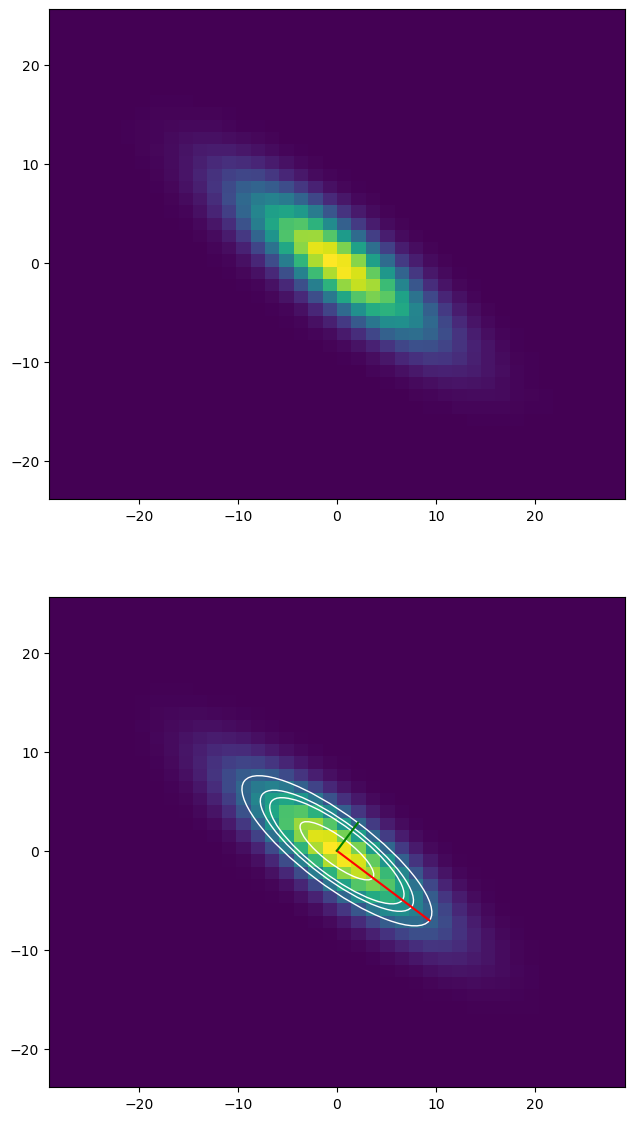

In [77]:
import numpy as np

B = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(B)
A@A.T
v, d, w = np.linalg.svd(B)
A = v @ np.diag(np.sqrt(d))
A@A.T
samples = A @ np.random.randn(2, 1000000)
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(2, 1, figsize=(20, 14))

h, x, y, _ = ax[0].hist2d(*samples, bins=40)
ax[0].set_aspect('equal')

grid = np.stack(np.meshgrid((x[1:] + x[:-1])/2, (y[1:] + y[:-1])/2))
pdf = multivariate_normal.pdf(grid.reshape(2, -1).T, cov=B).reshape(h.shape)

ax[1].imshow(pdf, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()))
ax[1].set_aspect('equal')

eigenvalues, eigenvectors = np.linalg.eig(B)

confidence_level = [0.5,0.9,0.95,0.99] 

for j in range (0,4):
    c2 = chi2.ppf(confidence_level[j],2)
    xa = np.sqrt(c2 * eigenvalues[0])
    ya = np.sqrt(c2 * eigenvalues[1])
    phi = np.degrees(np.arctan2((-1)*eigenvectors[0, 1], eigenvectors[0, 0]))
    confidence_ellipse = plt.matplotlib.patches.Ellipse([0,0], width=xa, height=ya, angle=phi, edgecolor='white', fill=False, linewidth=1)
    plt.gca().add_patch(confidence_ellipse)
s = [0,(eigenvectors[0,0])*xa/2]
t = [0, (eigenvectors[0, 1]*(-1))*xa/2]
plt.plot(s,t, color='r')
s = [0,eigenvectors[1,0]*(-1)*ya/2]
t = [0, eigenvectors[1, 1]*ya/2]
plt.plot(s, t,color='g')
plt.show()